# Importing needed dependencies


In [25]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

import pandas as pd
import seaborn as sns 


C:\Users\mmcd\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data preprocessing


# Exploring the raw data


In [2]:
kddtrain=pd.read_csv('trainset.csv')
kddtest=pd.read_csv('KDDTest.csv')

In [3]:
kddtrain.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class,num,categorie
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,3,0,tcp,http,SF,232,8153,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,4,0,tcp,http,SF,199,420,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [4]:
kddtest.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class,num,categorie
0,0,0,tcp,private,REJ,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,DOS
1,1,2,tcp,ftp_data,SF,12983,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,normal
2,2,0,icmp,eco_i,SF,20,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,unknown
3,3,1,tcp,telnet,RSTO,0,15,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,unknown
4,4,0,tcp,http,SF,267,14515,0,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,normal


In [5]:
kddtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 45 columns):
ID                             125973 non-null int64
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 

In [6]:
kddtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22542 entries, 0 to 22541
Data columns (total 45 columns):
ID                             22542 non-null int64
duration                       22542 non-null int64
protocol_type                  22542 non-null object
service                        22542 non-null object
flag                           22542 non-null object
src_bytes                      22542 non-null int64
dst_bytes                      22542 non-null int64
land                           22542 non-null int64
wrong_fragment                 22542 non-null int64
urgent                         22542 non-null int64
hot                            22542 non-null int64
num_failed_logins              22542 non-null int64
logged_in                      22542 non-null int64
num_compromised                22542 non-null int64
root_shell                     22542 non-null int64
su_attempted                   22542 non-null int64
num_root                       22542 non-null int64
num_

# show count categorie of attacks

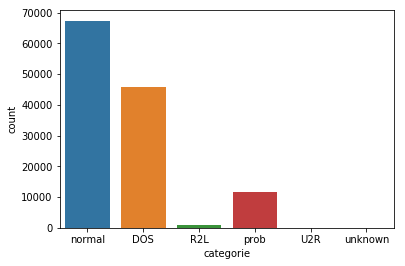

In [7]:
sns.countplot(x='categorie',data=kddtrain)

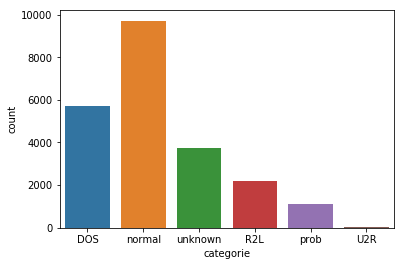

In [8]:
sns.countplot(x='categorie',data=kddtest)

# Data normalization

In [9]:
kddtrain.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class,num,categorie
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,3,0,tcp,http,SF,232,8153,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,4,0,tcp,http,SF,199,420,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


 # Checking for missing values

In [10]:
kddtrain.isna().sum()

ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
srv_rerror_rate.1              0
same_srv_r

# Encoding dummy variables


In [11]:
dummies=['protocol_type','service','flag']
dataset_Train_dummied = pd.get_dummies(kddtrain, columns=dummies)
dataset_Train_dummied = dataset_Train_dummied.drop('ID', axis=1)


In [12]:
dummies=['protocol_type','service','flag']
dataset_Test_dummied = pd.get_dummies(kddtest, columns=dummies)
dataset_Test_dummied = dataset_Test_dummied.drop('ID', axis=1)

In [49]:
dataset_Train_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 125 entries, duration to flag_SH
dtypes: float64(15), int32(1), int64(24), object(1), uint8(84)
memory usage: 49.0+ MB


In [50]:
dataset_Train_dummied.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
dataset_Train_dummied['categorie'].unique()


array(['normal', 'DOS', 'R2L', 'prob', 'U2R', 'unknown'], dtype=object)

In [14]:
dataset_Test_dummied['categorie'].unique()


array(['DOS', 'normal', 'unknown', 'R2L', 'prob', 'U2R'], dtype=object)

In [15]:
dataset_Train_dummied['categorie'] = dataset_Train_dummied['categorie'].map( {'DOS': 0, 'U2R': 1,'R2L':2,'prob':3,'normal':4,'unknown':5} ).astype(int)

In [16]:
dataset_Test_dummied['categorie'] = dataset_Test_dummied['categorie'].map( {'DOS': 0, 'U2R': 1,'R2L':2,'prob':3,'normal':4,'unknown':5} ).astype(int)

In [17]:
dataset_Train_dummied['categorie'].unique()

array([4, 0, 2, 3, 1, 5], dtype=int64)

In [18]:
dataset_Test_dummied['categorie'].unique()

array([0, 4, 5, 2, 3, 1], dtype=int64)

In [19]:
X=dataset_Train_dummied.loc[:, dataset_Train_dummied.columns != 'categorie']


In [20]:
X = X.drop('class', axis=1)


In [21]:
X=X.drop('num',axis=1)

In [22]:
y=dataset_Train_dummied['categorie']

In [23]:
Xtest=dataset_Test_dummied.loc[:, dataset_Test_dummied.columns != 'categorie']
Xtest = Xtest.drop('class', axis=1)
Xtest=Xtest.drop('num',axis=1)

In [24]:
ytest=dataset_Test_dummied['categorie']

# Model creation


# Spliting dataset_Train into train and test

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Trying Decision tree

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test,y_pred)

In [30]:
accuracy

0.9983726929946418

# Naive Bayes

In [33]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

In [34]:
y_pred = gnb.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test,y_pred)

In [36]:
accuracy

0.3842429053383608

# MLPClassifier

In [37]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=60, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=10,
                    learning_rate_init=.0001)

In [39]:
mlp.fit(X_train, y_train)


Iteration 1, loss = 1.29898103
Iteration 2, loss = 0.90489501
Iteration 3, loss = 1.04485564
Iteration 4, loss = 0.90151757
Iteration 5, loss = 0.78195830
Iteration 6, loss = 0.77091160
Iteration 7, loss = 0.69325977
Iteration 8, loss = 0.63776529
Iteration 9, loss = 0.56761372
Iteration 10, loss = 0.62874219
Iteration 11, loss = 0.55685389
Iteration 12, loss = 0.51710804
Iteration 13, loss = 0.48953406
Iteration 14, loss = 0.46693539
Iteration 15, loss = 0.44426619
Iteration 16, loss = 0.42640423
Iteration 17, loss = 0.41148893
Iteration 18, loss = 0.39869040
Iteration 19, loss = 0.38688536
Iteration 20, loss = 0.37564989
Iteration 21, loss = 0.36380812
Iteration 22, loss = 0.36044253
Iteration 23, loss = 0.33910038
Iteration 24, loss = 0.31740338
Iteration 25, loss = 0.30363128
Iteration 26, loss = 0.30362326
Iteration 27, loss = 0.28939531
Iteration 28, loss = 0.28118067
Iteration 29, loss = 0.27605361
Iteration 30, loss = 0.27409481
Iteration 31, loss = 0.26862945
Iteration 32, los

C:\Users\mmcd\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=60, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [40]:
y_pred = mlp.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test,y_pred)

In [42]:
accuracy

0.9634451280015877

# Model saving and loading

In [43]:
import pickle
pickle.dump(clf, open("model_tree.pkl",'wb'))

In [44]:
model = pickle.load(open("model_tree.pkl",'rb'))

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)

In [46]:
import numpy as np

In [47]:
forest = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(forest, X, y, cv= k_fold, scoring=scoring)
print(score)

[0.99912685 0.99888871 0.99920622 0.99896801 0.99825355 0.99841232
 0.99880924 0.99857109 0.99896801 0.99833294]


In [48]:
(np.mean(score))

0.9987536935636958